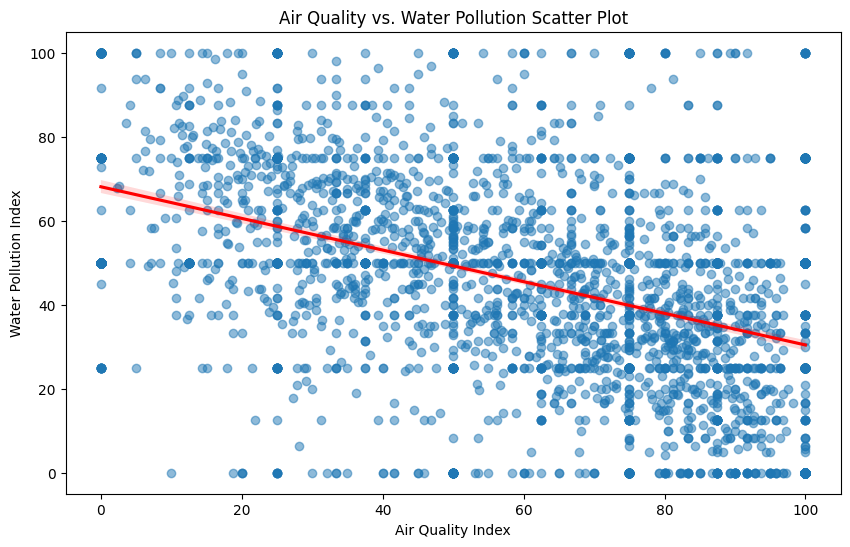

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'cities_air_quality_water_pollution.18-10-2021.csv' # Add dataset location here 
data = pd.read_csv(data_path)

# Clean up the column names by removing extra spaces and quotation marks
data.columns = data.columns.str.strip().str.replace('"', '')

# Creating the scatter plot with a red regression line while retaining the updated title
plt.figure(figsize=(10, 6))
scatter = sns.regplot(x='AirQuality', y='WaterPollution', data=data, 
                      scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
# Create the graphs 
plt.title('Air Quality vs. Water Pollution Scatter Plot')
plt.xlabel('Air Quality Index')
plt.ylabel('Water Pollution Index')
plt.show()

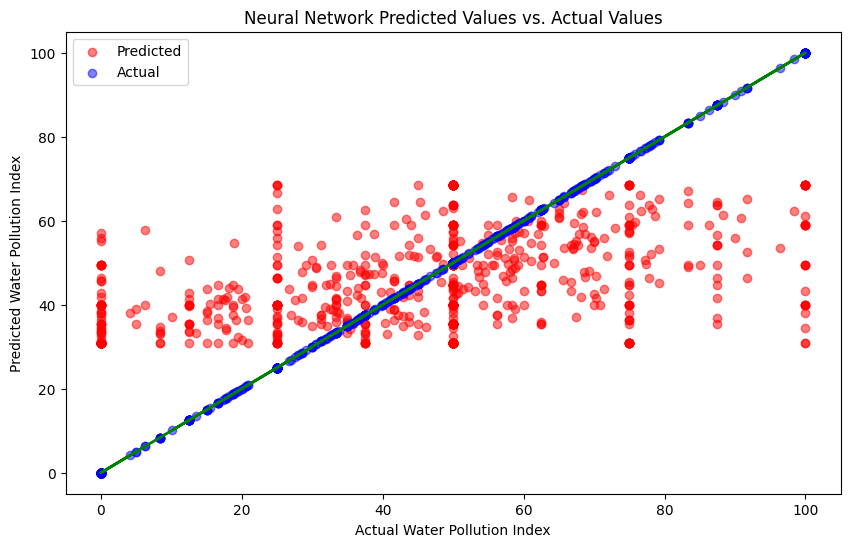

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Load the dataset
data = pd.read_csv('cities_air_quality_water_pollution.18-10-2021.csv') # Insert data path here 

# Clean up the column names
data.columns = data.columns.str.strip().str.replace('"', '')

# Separate the features and target variable
X = data['AirQuality'].values.reshape(-1, 1)  # Reshape is required because we only have one feature
y = data['WaterPollution'].values

# Clean up the column names
data.columns = data.columns.str.replace('"', '').str.strip()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor neural network model
nn_model = MLPRegressor(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # 'relu' activation function
    solver='adam',              # 'adam' solver for weight optimization
    max_iter=500,               # Set the number of iterations (epochs)
    random_state=42             # Set the seed for reproducibility
)

# Train the model with the training data
nn_model.fit(X_train, y_train)

# Predicting the water pollution values using the air quality index from the test set
y_pred_nn = nn_model.predict(X_test)

# Now let's create a scatter plot to compare the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='red', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual')

# Plotting the perfect prediction line
plt.plot(y_test, y_test, color='green', linewidth=2)

plt.title('Neural Network Predicted Values vs. Actual Values')
plt.xlabel('Actual Water Pollution Index')
plt.ylabel('Predicted Water Pollution Index')
plt.legend()
plt.show()

In [7]:
# print(y_test)
# print(y_pred_nn)
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_nn})
reg_model_diff

,Actual value,Predicted value
0,10.144928,37.119815
1,41.666667,45.709898
2,0.000000,33.279124
3,50.000000,30.898311
4,50.904977,55.233625
...,...,...
788,12.500000,39.724931
789,0.000000,49.492957
790,87.500000,54.221781
791,100.000000,58.950604


Pe scurt, această imagine prezintă un grafic în care:
    -Punctele roșii sunt nivelurile de poluare a apei prezise de rețeaua neurală.
    -Punctele albastre sunt nivelurile empirice de poluare a apei.
    -Linia verde este locul unde s-ar afla punctele dacă predicțiile computerului ar fi perfecte.
Dacă punctele roșii sunt aproape de linia verde, computerul face o predicție bună. Dacă sunt departe de linia verde, previziunile nu sunt la fel de precise.